# Velocity at Depth Levels

The goal of this notebook is the following:

1) serve as an example of how to post-process CESM/MOM6 output;

2) create time averages of Eulerian velocity fields at depth levels;

3) compare model results vs. another model results.

The analysis below is organized into regions: [Global](#global)

In [1]:
%matplotlib inline
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.latlon_analysis import time_mean_latlon
from mom6_tools.m6toolbox import check_time_interval
from mom6_tools.m6plot import xycompare, polarcomparison
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from IPython.display import display, Markdown, Latex
import warnings
warnings.filterwarnings("ignore")

Basemap module not found. Some regional plots may not function properly


In [2]:
# The following parameters must be set accordingly
######################################################
# case name - must be changed for each configuration
case_nameA = "g.c2b6.GJRA.TL319_t061.long_JRA_mct.076"
case_nameB = "g.c2b6.GJRA.TL319_t061.long_JRA_mct.077"
# Path to the run directory
pathA = "/glade/scratch/gmarques/"+case_nameA+"/run/"
pathB = "/glade/scratch/gmarques/"+case_nameB+"/run/"
# name of ocean static file
staticA = case_nameA+".mom6.static.nc"
staticB = case_nameB+".mom6.static.nc"
# name of montly mean file in z-space
outputA = case_nameA+".mom6.h_*.nc"
outputB = case_nameB+".mom6.h_*.nc"
# initial and final years for computing time mean
year_start = 30
year_end = 59
# Put your name and email address below
author = 'Gustavo Marques (gmarques@ucar.edu)'
######################################################
# create an empty class object
class args:
  pass

args.infileA = pathA+outputA
args.infileB = pathB+outputB
args.year_start = year_start
args.year_end = year_end
args.case_nameA = case_nameA
args.savefigs = False
args.time_series = True

In [3]:
# load mom6 grid
grd = MOM6grid(pathA+staticA)

MOM6 grid successfully loaded... 



In [4]:
# load model output
out_ncA = xr.open_mfdataset(args.infileA, decode_coords=False, decode_times=False)
out_ncB = xr.open_mfdataset(args.infileB, decode_coords=False, decode_times=False)
# time in years
out_ncA['time'] = out_ncA.time/365.
out_ncB['time'] = out_ncB.time/365.

In [5]:
# check if data includes years between ti and tf
ti = args.year_start
tf = args.year_end
check_time_interval(ti,tf,out_ncA)
check_time_interval(ti,tf,out_ncB)

In [6]:
# time averages
uA = np.ma.masked_invalid(out_ncA['uo'].sel(time=slice(ti,tf)).mean('time').values)
vA = np.ma.masked_invalid(out_ncA['vo'].sel(time=slice(ti,tf)).mean('time').values)
uB = np.ma.masked_invalid(out_ncB['uo'].sel(time=slice(ti,tf)).mean('time').values)
vB = np.ma.masked_invalid(out_ncB['vo'].sel(time=slice(ti,tf)).mean('time').values)

### Global
<a id=global></a>

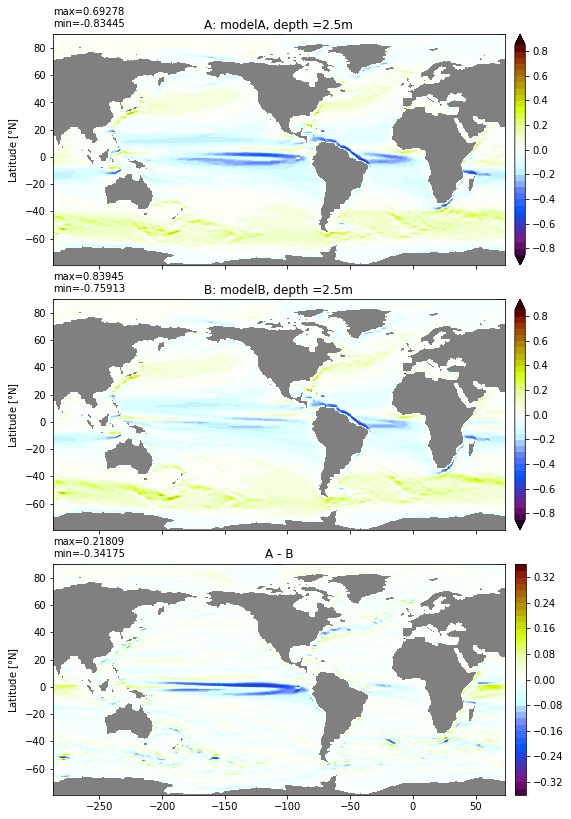

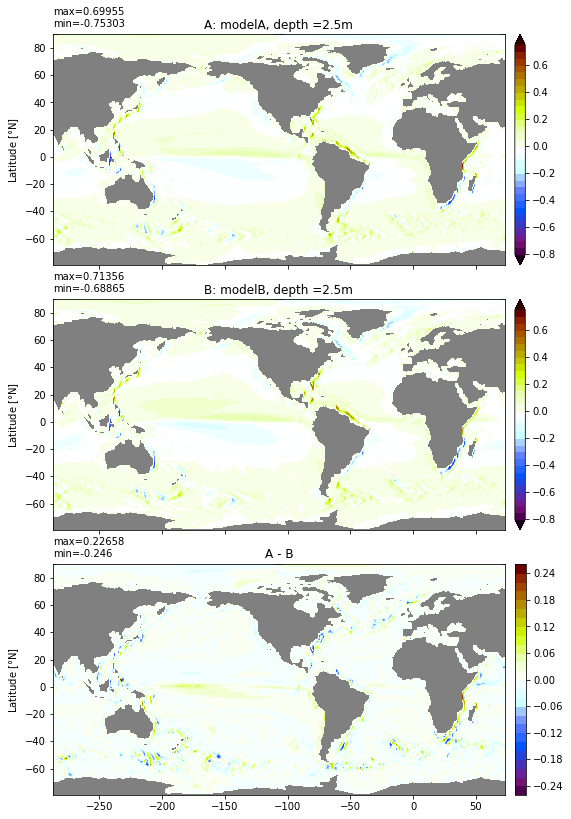

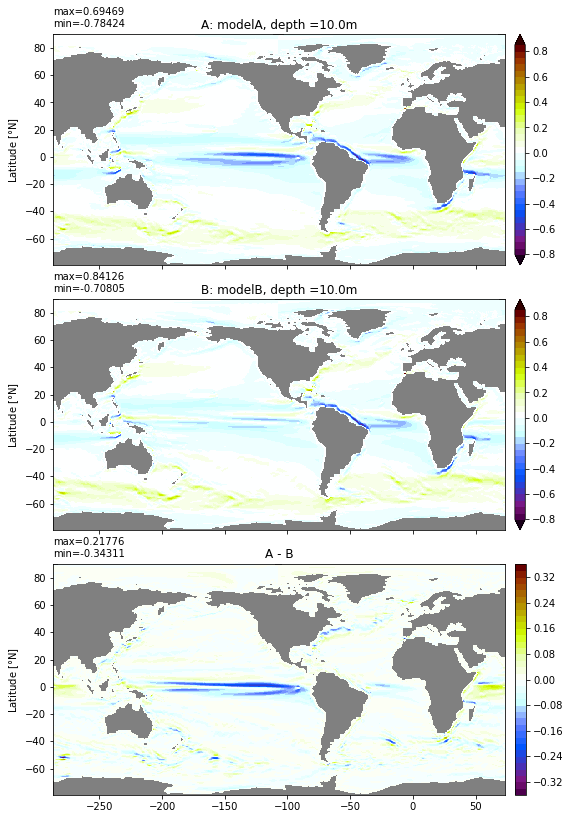

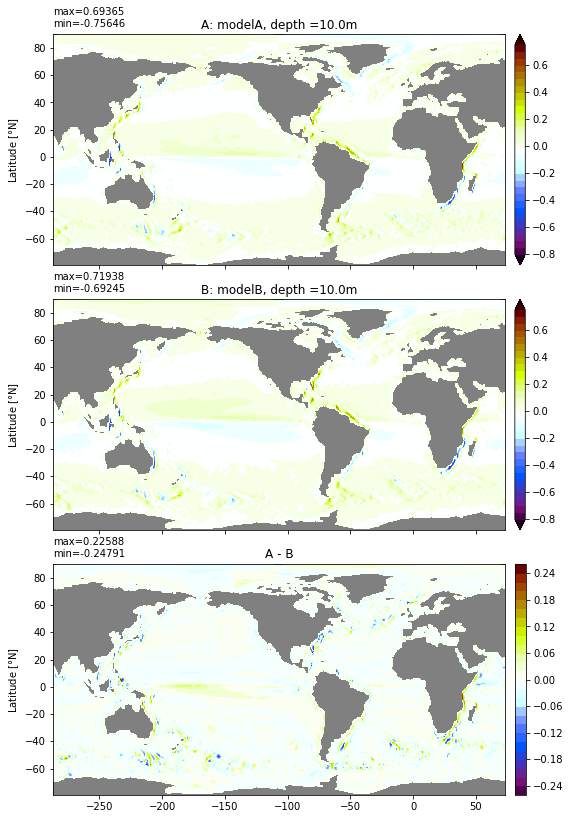

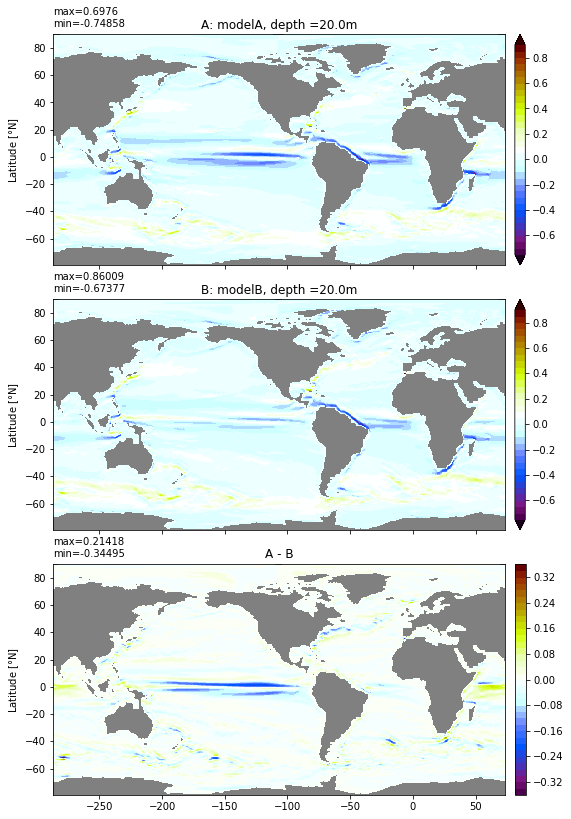

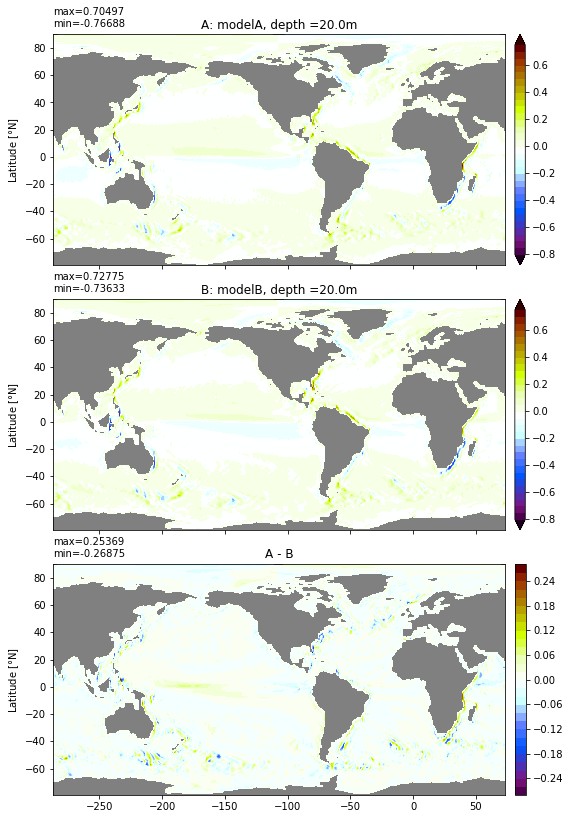

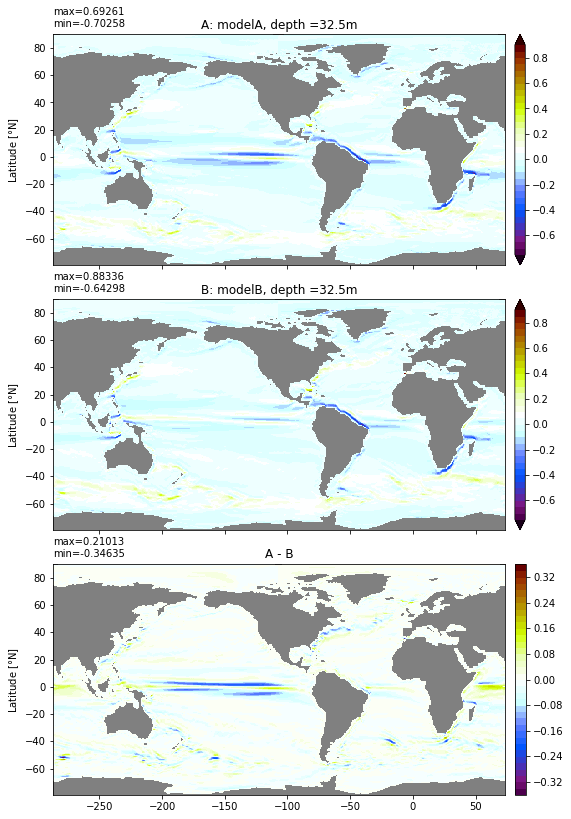

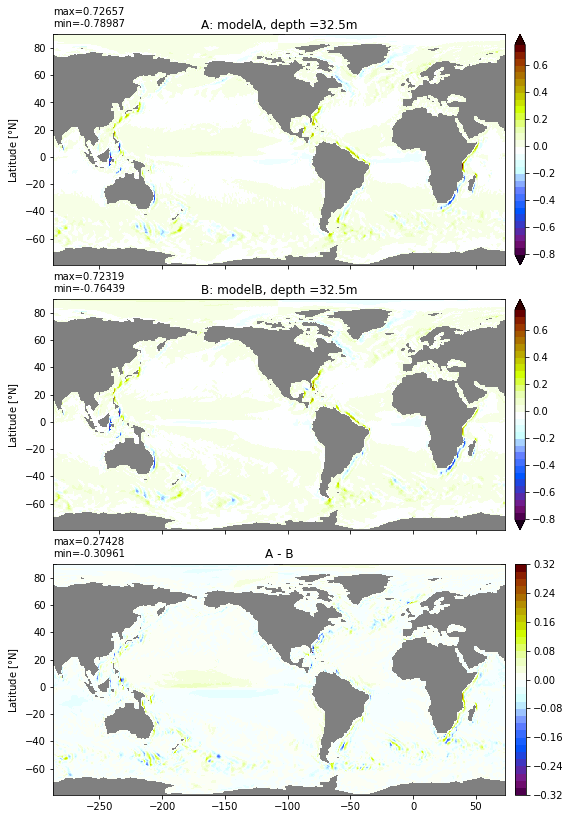

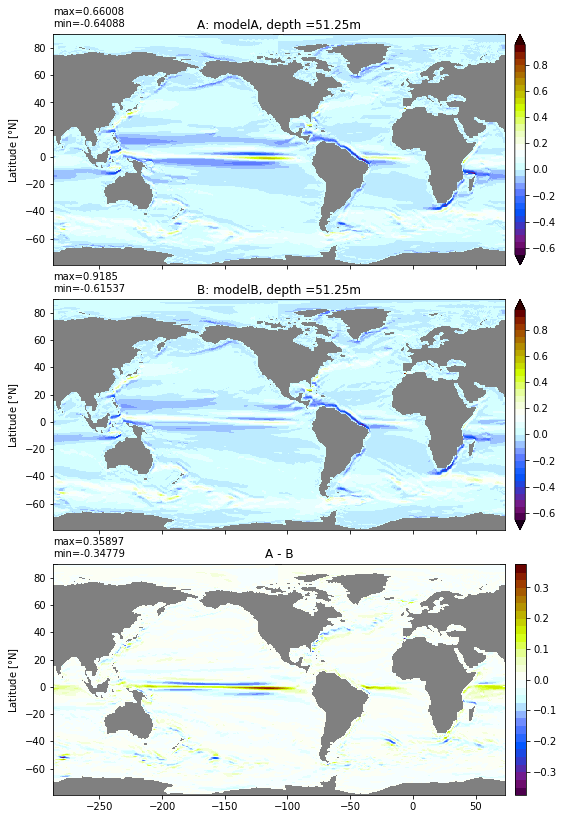

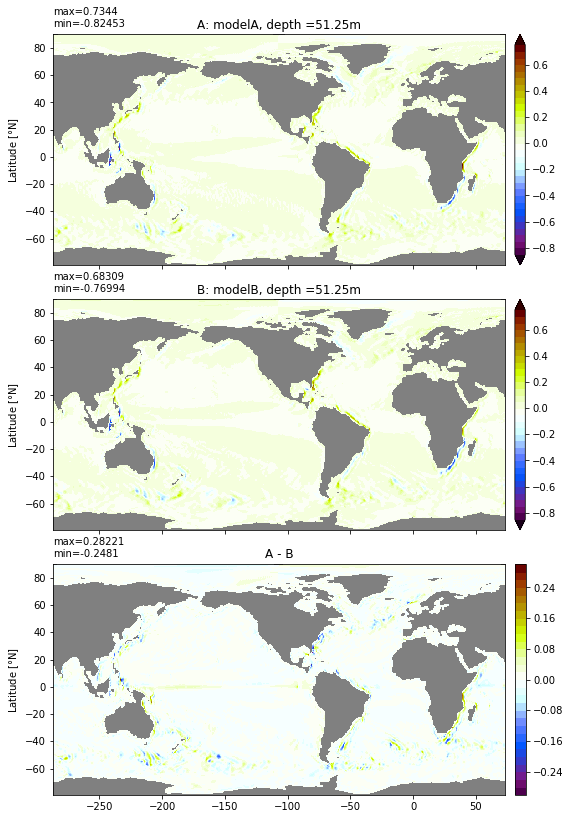

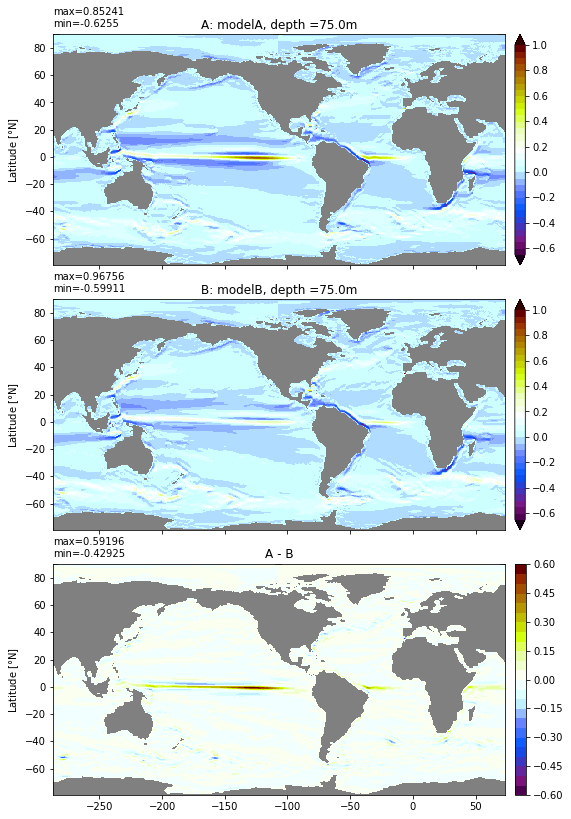

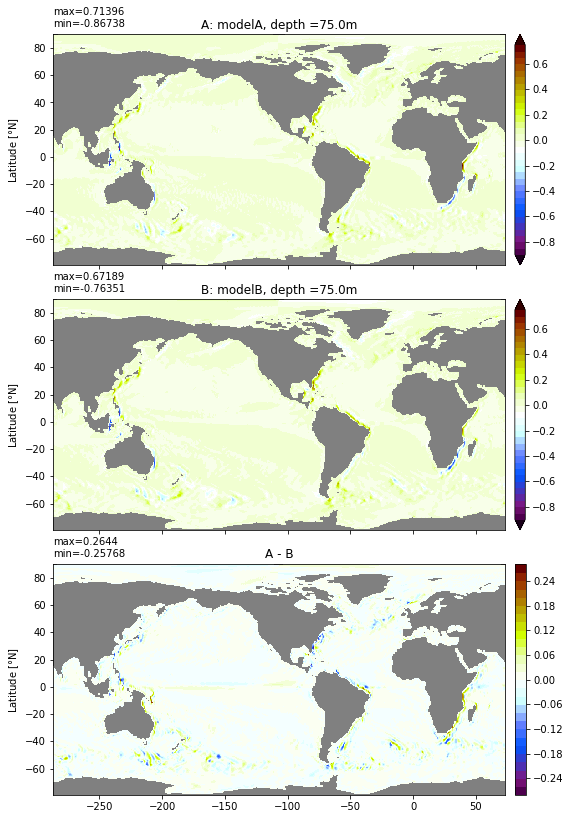

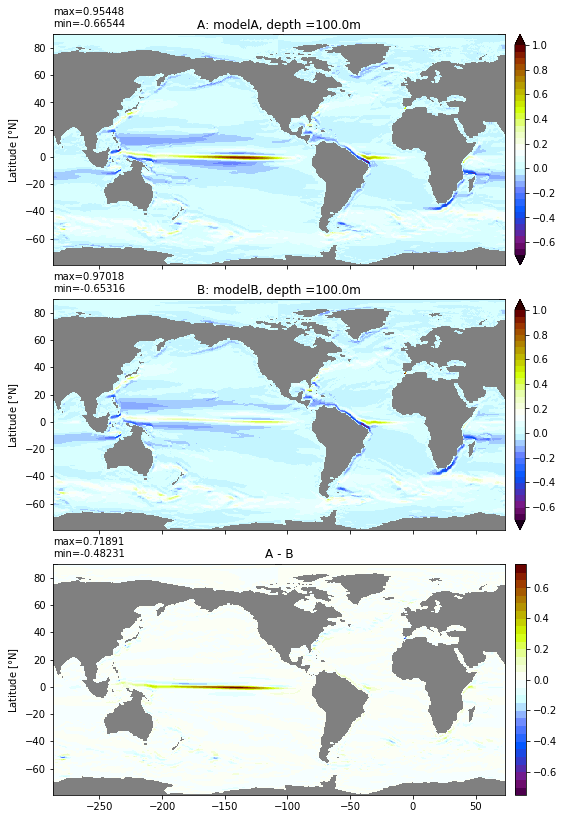

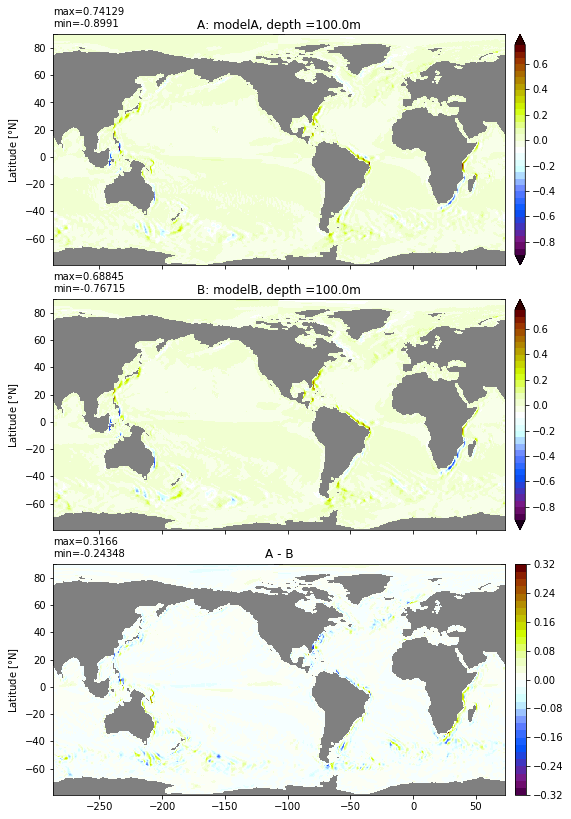

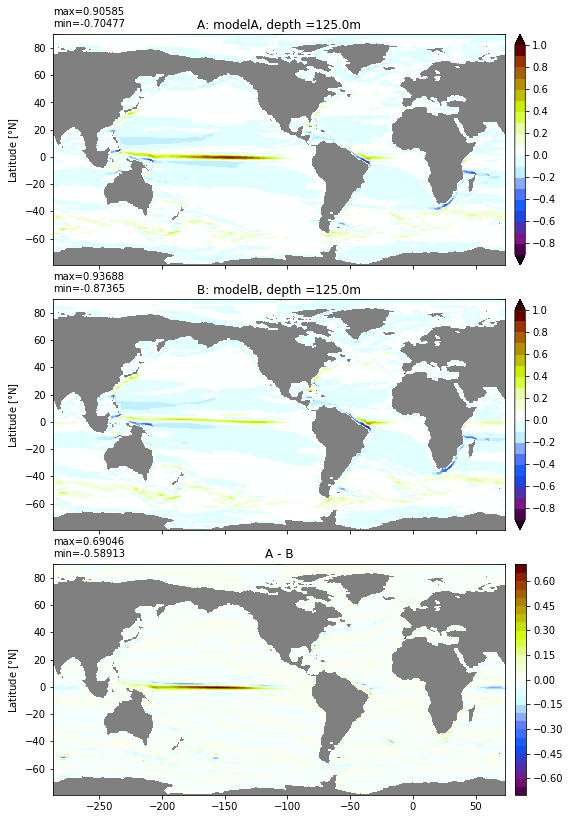

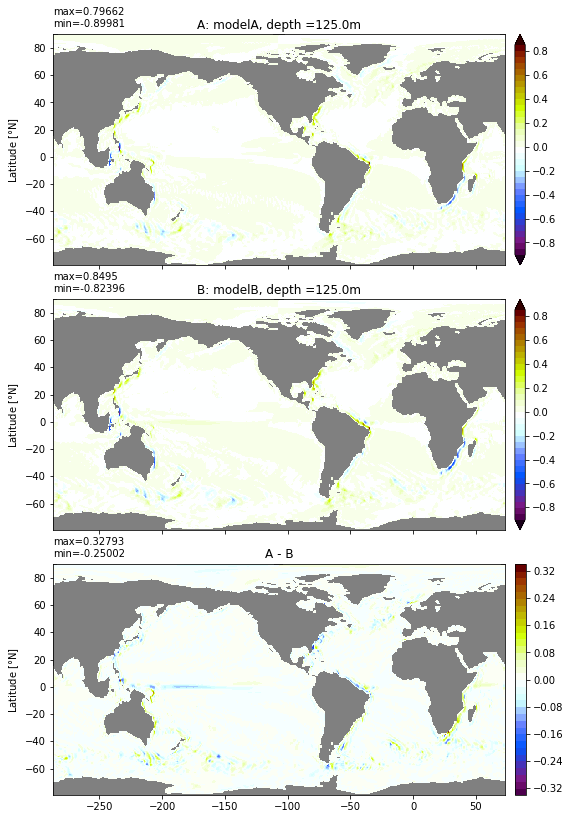

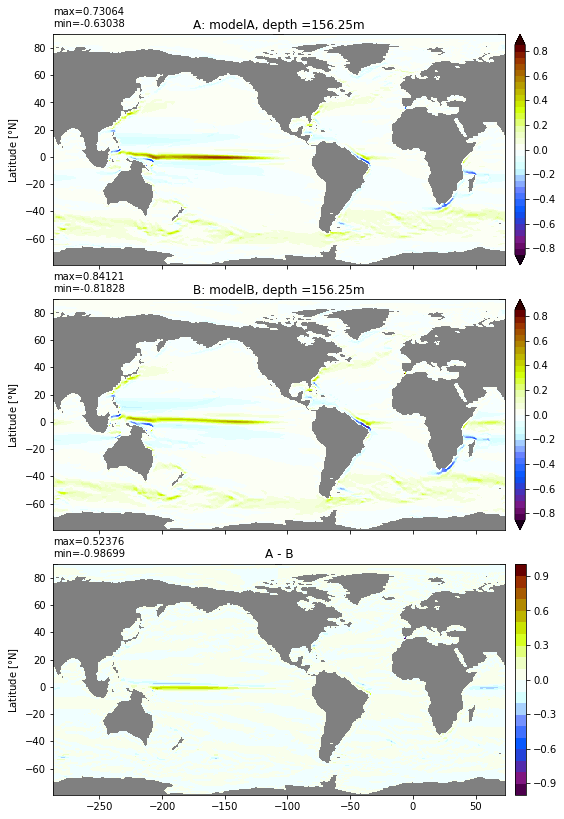

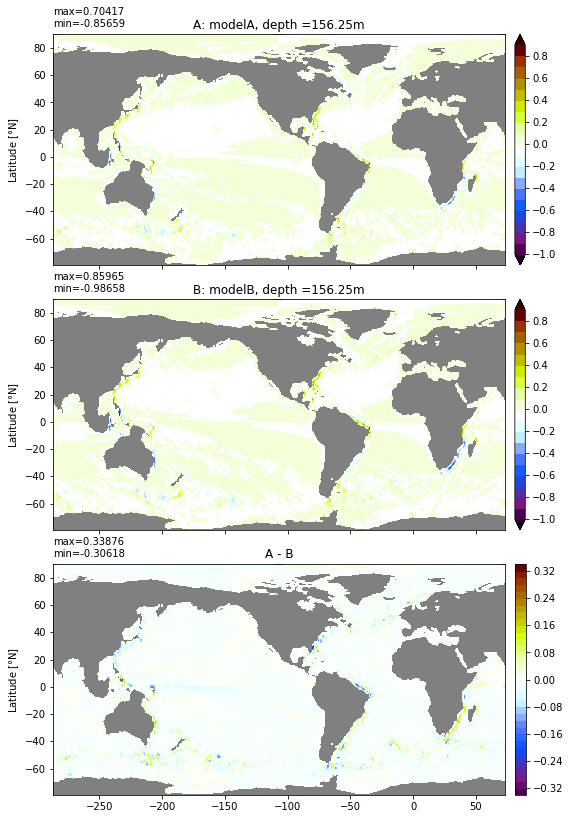

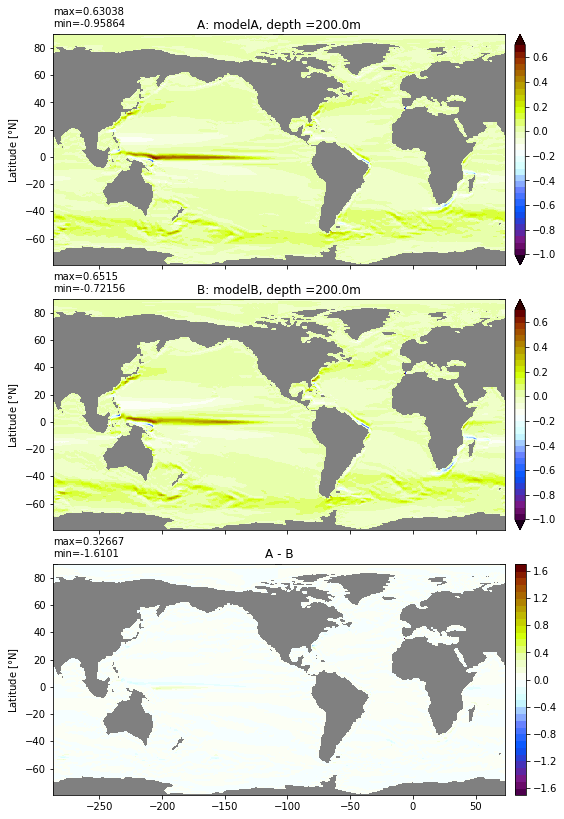

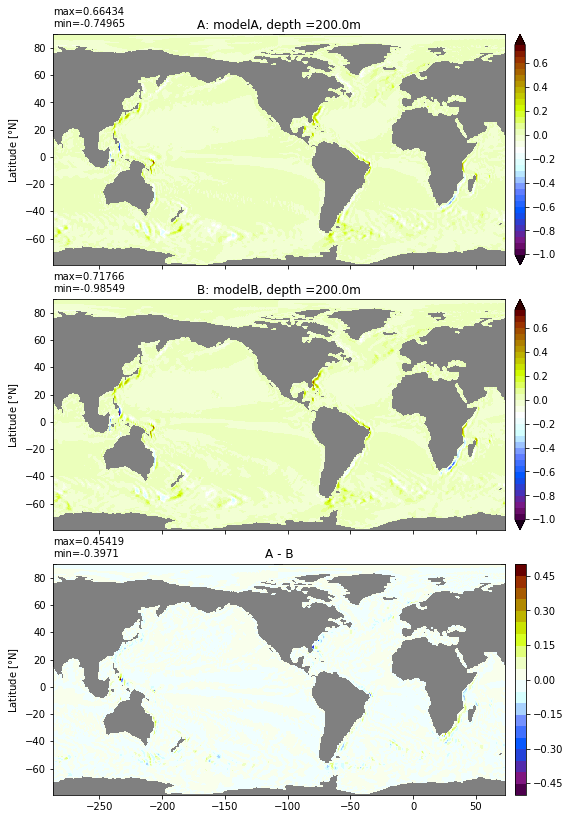

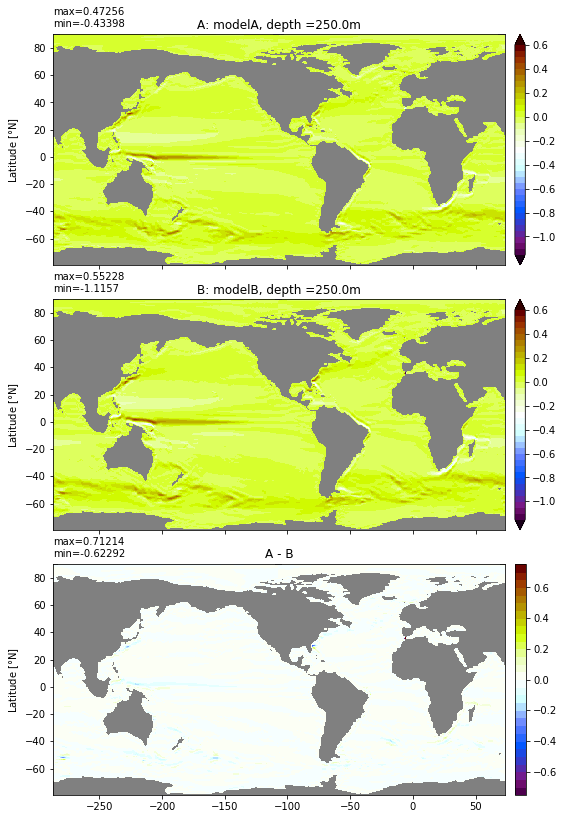

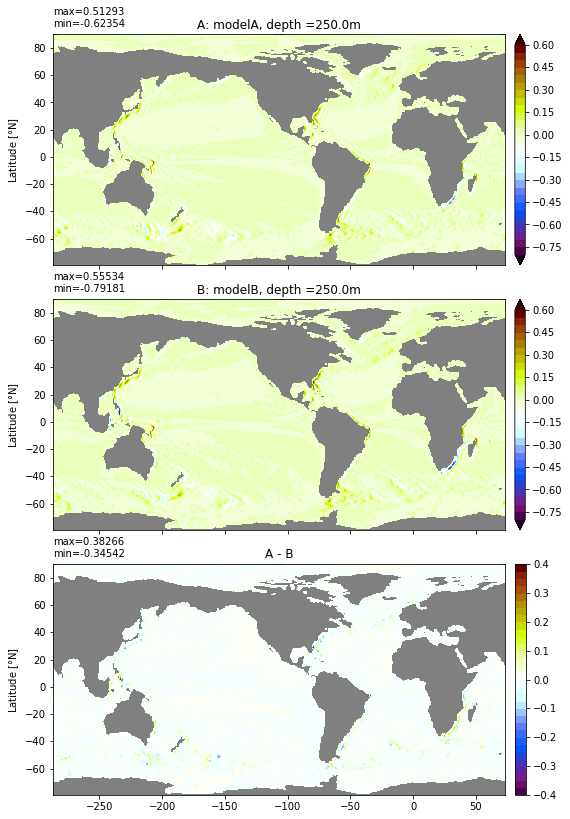

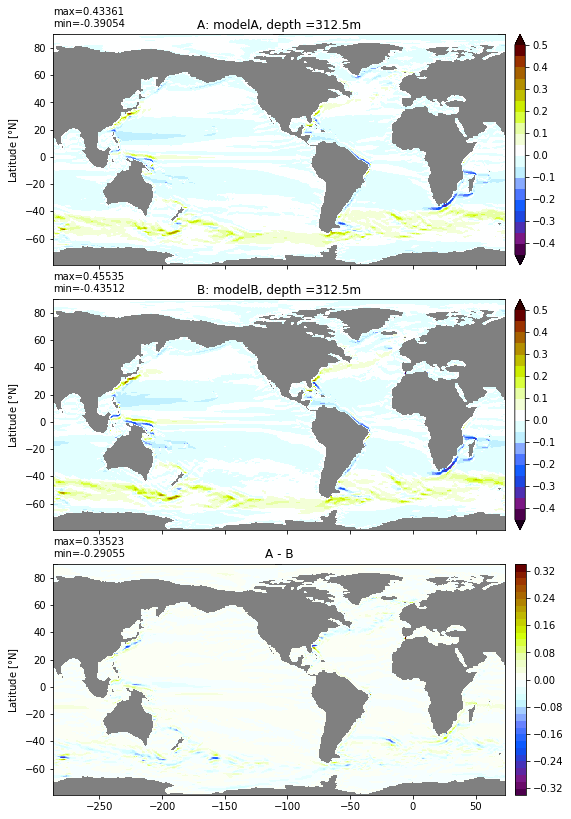

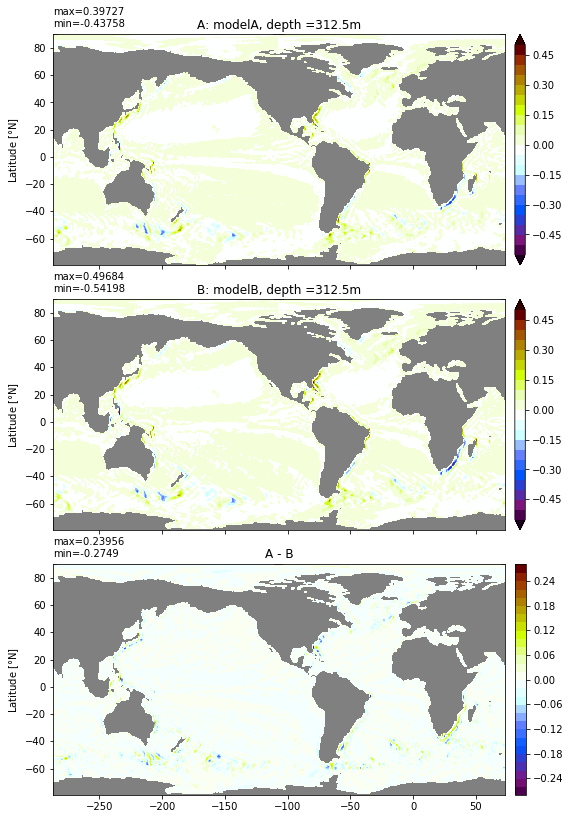

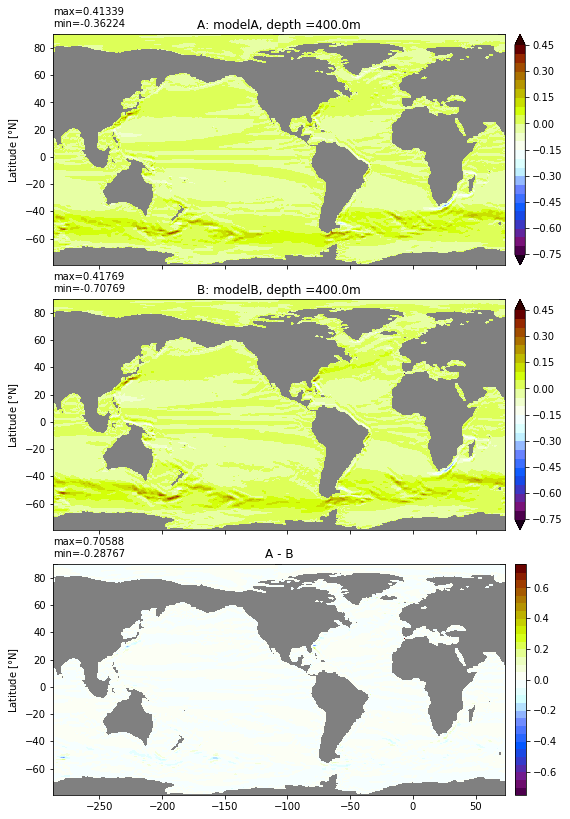

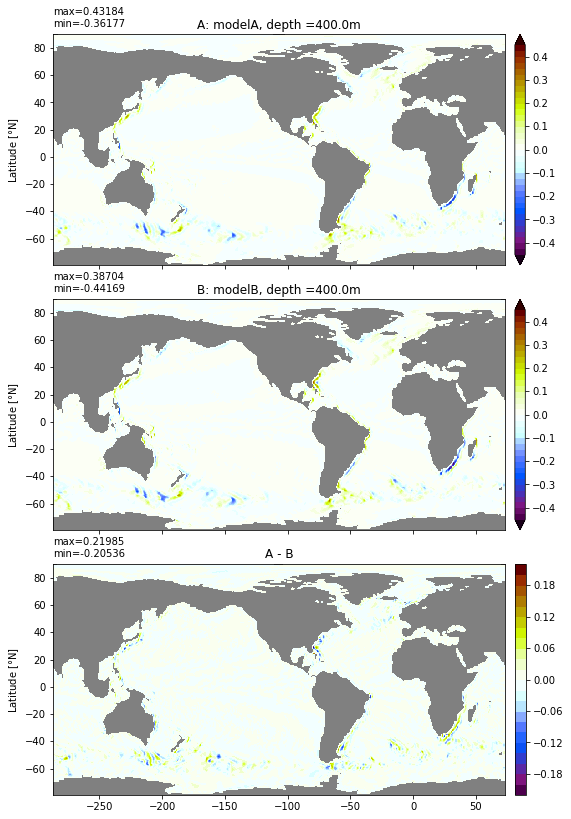

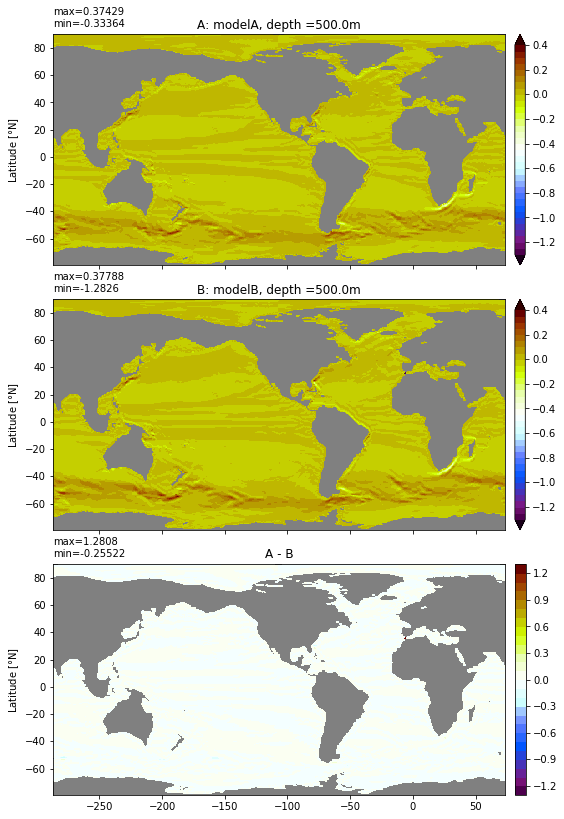

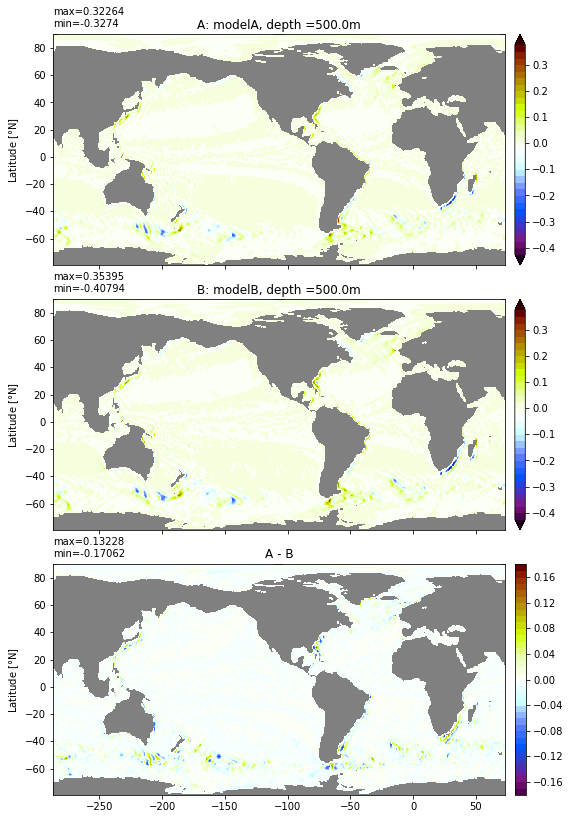

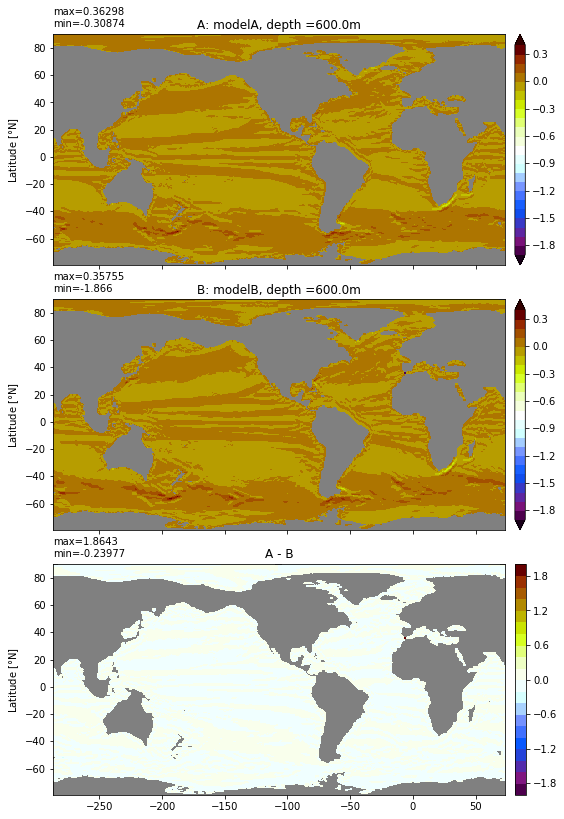

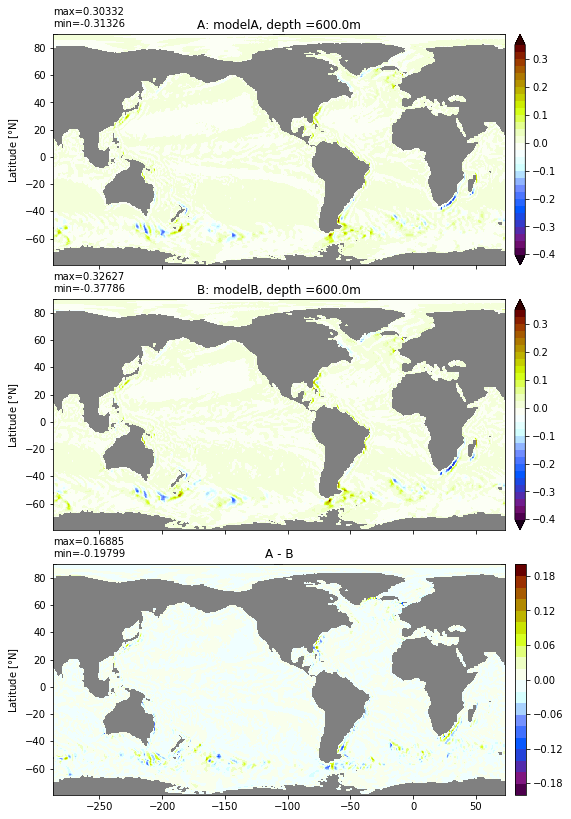

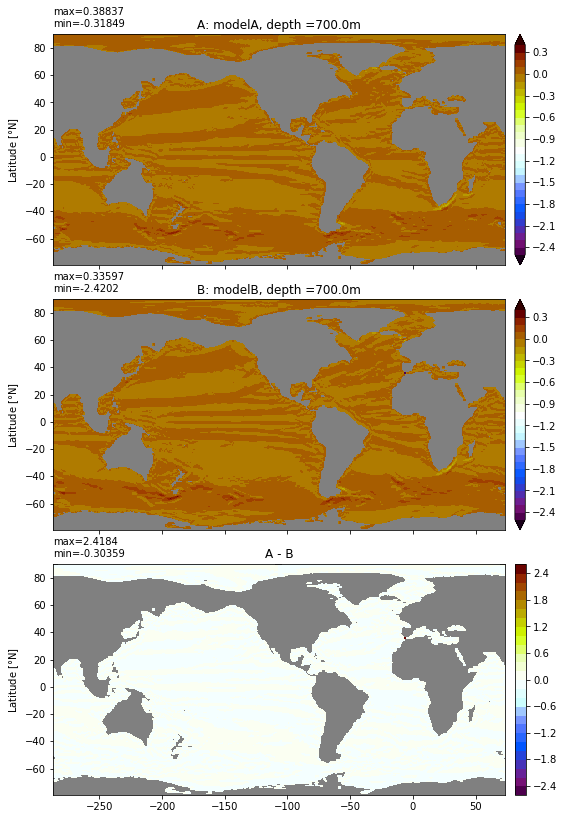

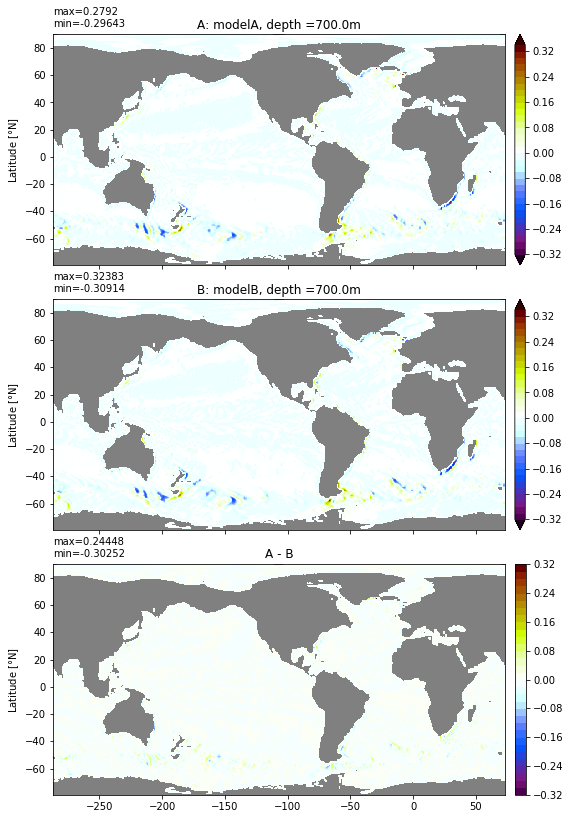

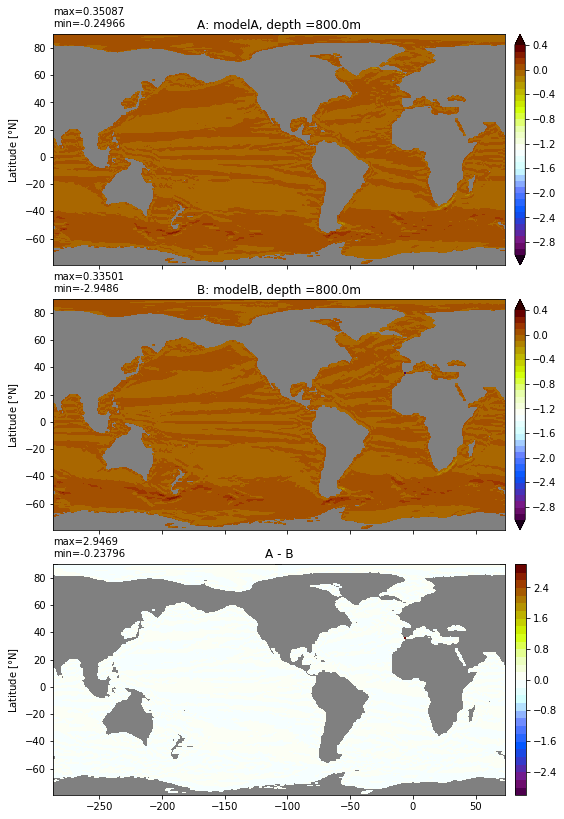

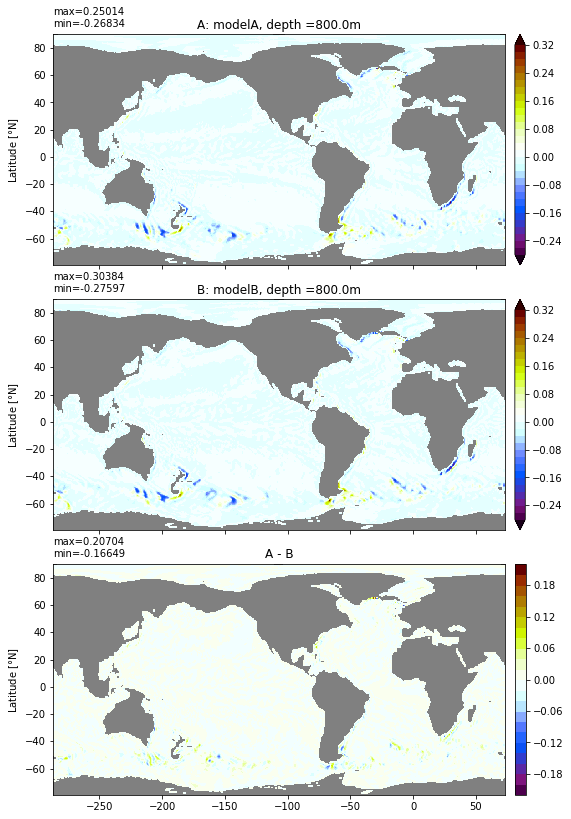

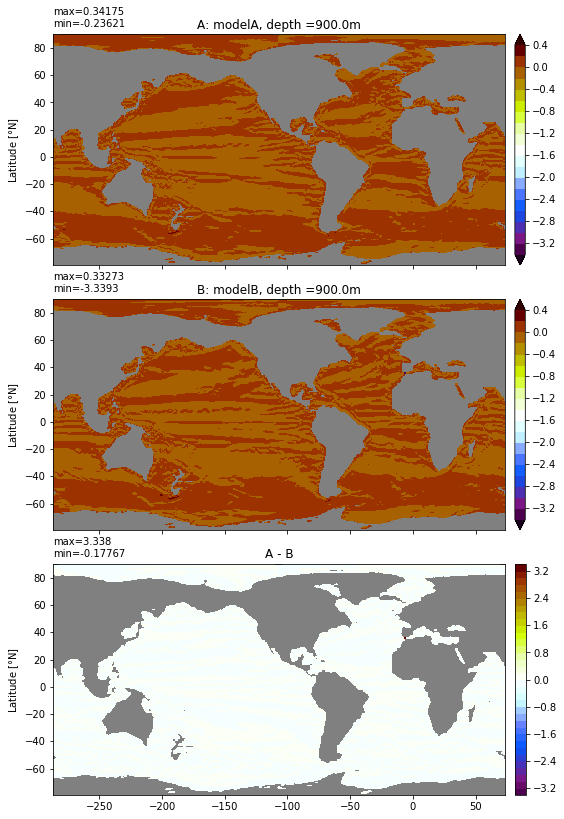

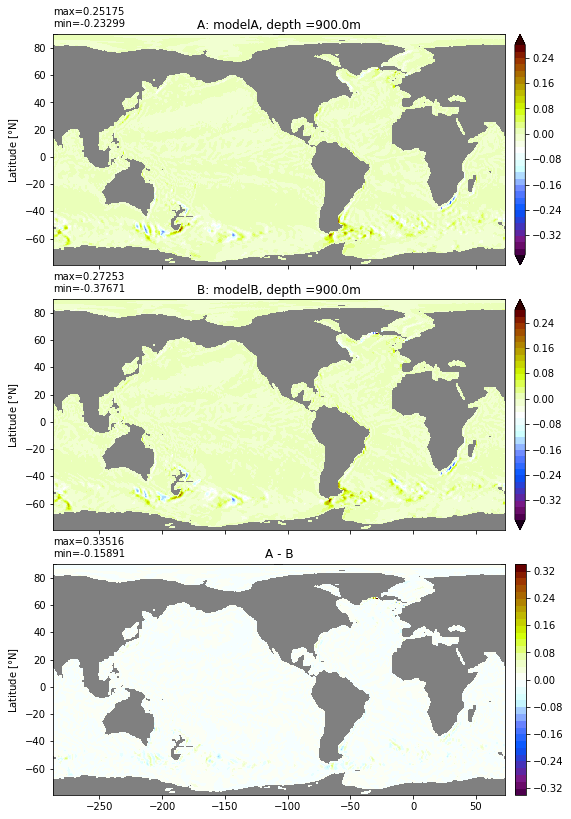

In [7]:
%matplotlib inline
# loop over depths and compare TS fields
km = uA.shape[0]
for k in range(km):
  if out_ncA['z_l'][k].values < 1000.0:
    xycompare(uA[k,:] , uB[k,:], grd.geolon_u, grd.geolat_u, #area=grd.area_t,
            title1 = 'modelA, depth ='+str(out_ncA['z_l'][k].values)+ 'm',
            title2 = 'modelB, depth ='+str(out_ncB['z_l'][k].values)+ 'm',
            extend='both',
            show= True)
    # WARNING: we should use geo*_v below but xlim in plots look strange so I am using geolat/geolon instead...
    xycompare( vA[k,:] , vB[k,:], grd.geolon, grd.geolat, 
            title1 = 'modelA, depth ='+str(out_ncA['z_l'][k].values)+ 'm',
            title2 = 'modelB, depth ='+str(out_ncB['z_l'][k].values)+ 'm',
            extend='both',
            show= True)